# Theis pumping test
This notebook demonstrate the application of the Theis principle for pumping test evaluation in confined, transient setups. Parts of the notebook use code from Randy Hunt (refer to P3_4 from the textbook of Anderson, Woessner, and Hunt (2015) - available on GITHUB)

Initiate

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
#import sys, os
from mpl_toolkits.axes_grid1 import make_axes_locatable

Given data (measurement)

In [9]:
m_time = [0.50,1.00,1.33,2.00,3.00,5.00,7.00,9.33,13.50,22.00,30.00] # time in minutes
m_ddown = [0.30,0.37,0.38,0.40,0.43,0.49,0.52,0.53,0.55,0.56,0.57]   # drawdown in meters

In [10]:
#Define a function, class, and object for Theis Well analysis

def well_function(u):
    return scipy.special.exp1(u)

def theis_u(T,S,r,t):
    u = r ** 2 * S / 4. / T / t
    return u

def theis_s(Q, T, u):
    s = Q / 4. / np.pi / T * well_function(u)
    return s

def theis_wu(Q, T, s):
    wu = s * 4. * np.pi * T / Q
    return wu

Compute data for the well function

In [11]:
u_max = 1
r_max = 100000
u  = [u_max for x in range(r_max)]
um = [u_max for x in range(r_max)]
u_inv  = [r_max/u_max for x in range(r_max)]
um_inv = [r_max/u_max for x in range(r_max)]
w_u  = [well_function(u_max/r_max) for x in range(r_max)]
w_um = [well_function(u_max/r_max) for x in range(r_max)]

for x in range(1,r_max,1):
    if x>0:
        u[x] = x*u_max/r_max
        u_inv[x] = 1/u[x]
        w_u[x] = well_function(u[x])

Given data for solution

In [12]:
# Parameters needed to solve Theis
r = 23      # m
m = 8.5       # m
Q = 0.0267     #m^3/d

Variable data (for fitting)

In [13]:
# Parameters needed to solve Theis
K = 5E-3     # m/s
T = K*m      # m^2/d (100 m/d Kh x 20 m thick)
S = 0.0002342  # unitless

Compute measured data and plot the well function

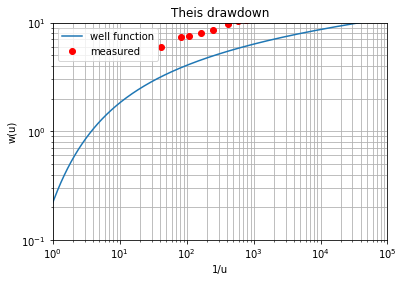

In [14]:
x = 0
for t in m_time:
    um[x] = theis_u(T,S,r,t*60)
    um_inv[x] = 1/um[x]
    w_um[x] = theis_wu(Q,T,m_ddown[x])
    x = x+1

fig, ax = plt.subplots()
ax.plot(u_inv, w_u)
ax.plot(um_inv, w_um,'ro')
plt.yscale("log")
plt.xscale("log")
plt.axis([1,1E5,1E-1,1E+1])
ax.set(xlabel='1/u', ylabel='w(u)',
       title='Theis drawdown')
ax.grid(which="both")
plt.legend(('well function','measured'))
   
plt.show()